In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import host, user, password
import seaborn as sns


Use the iris database to answer the following quesitons:



1. What does the distribution of petal lengths look like?


In [4]:
iris = sns.load_dataset("iris")
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


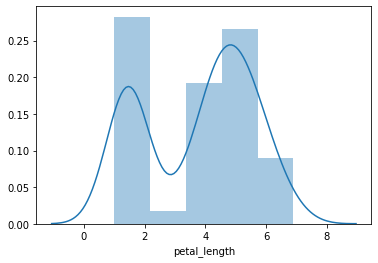

In [7]:
sns.distplot(iris.petal_length)

2. Is there a correlation between petal length and petal width?

The visualization shows a correlation between petal length and width.


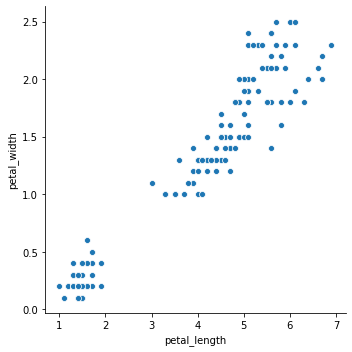

In [8]:
sns.relplot(data=iris, x="petal_length", y="petal_width")

3. Would it be reasonable to predict species based on sepal width and sepal length?

This visualization shows setosa species has greater sepal width at the same lengths as versicolor and virginica, so you might be able to make a species prediction for setosa compared to the other two species. It would not be reasonable to predict species based on sepal length and width for versicolor and virginica; they are too intermixed. 


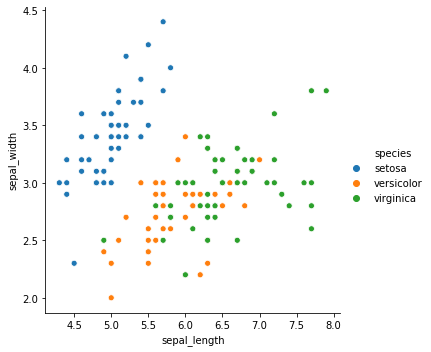

In [10]:
sns.relplot(data=iris, x="sepal_length", y="sepal_width", hue="species")

4. Which features would be best used to predict species?

This visualization shows that petal length and width are much better predictors for species. There are clear divisions by species in this distribution.

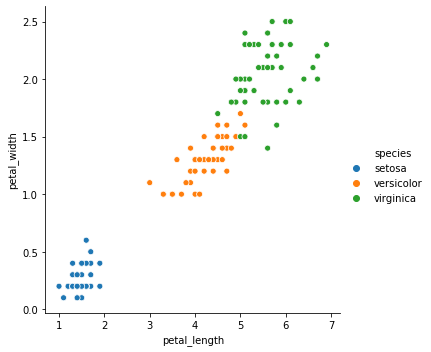

In [11]:
sns.relplot(data=iris, x="petal_length", y="petal_width", hue="species")

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [12]:
anscombe = sns.load_dataset("anscombe")
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [20]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [21]:
datasets = anscombe.groupby("dataset")
datasets

In [23]:
datasets.size()

dataset
I      11
II     11
III    11
IV     11
dtype: int64

In [28]:
datasets.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

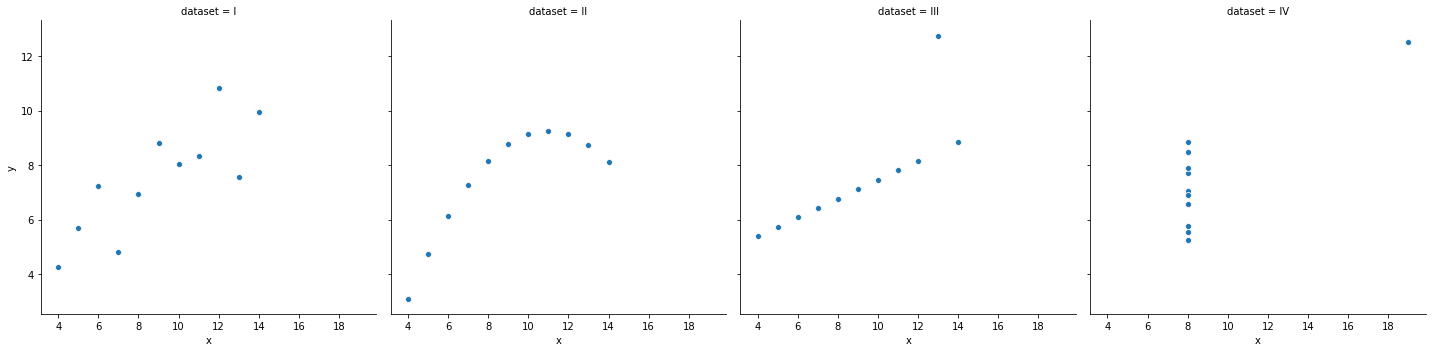

In [33]:
sns.relplot(data=anscombe, x="x", y="y", col="dataset")

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [124]:
insectsprays = data("InsectSprays", show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [115]:
insectsprays.describe()

,count
count,72.000000
mean,9.500000
std,7.203286
min,0.000000
25%,3.000000
50%,7.000000
75%,14.250000
max,26.000000


Text(0.5, 1.0, 'Effectiveness of Inspect Sprays')

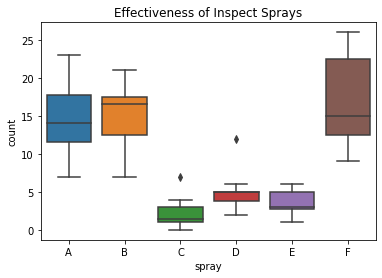

In [55]:
sns.boxplot(data=insectsprays, x="spray", y="count")
plt.title("Effectiveness of Inspect Sprays")

In [57]:
sprays = insectsprays.groupby("spray")
insectsprays["spray"].value_counts()

C    12
F    12
E    12
D    12
B    12
A    12
Name: spray, dtype: int64

In [58]:
sprays.get_group("A")

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


In [120]:
insectsprays.max()
insectsprays.min()
insectsprays.mean()

count    9.5
dtype: float64

3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

    Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    
    Does whether or not a province is Catholic influence fertility?
        The mean fertility rate amongst non-Catholic populations is 67.34% and the mean fertility rate amongst Catholic populations is 74.28%.
        
    What measure correlates most strongly with fertility?
        Education has a negative correlation with fertility.


In [131]:
data("swiss", show_doc=True)
swiss = data("swiss")


swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [132]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Text(0.5, 1, "Education's Effect on Fertility")

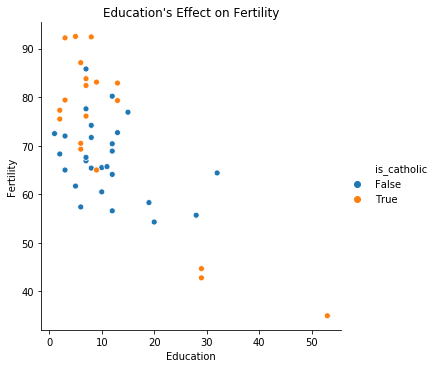

In [140]:
sns.relplot(data=swiss, x="Education", y="Fertility", hue="is_catholic")
plt.title("Education's Effect on Fertility")

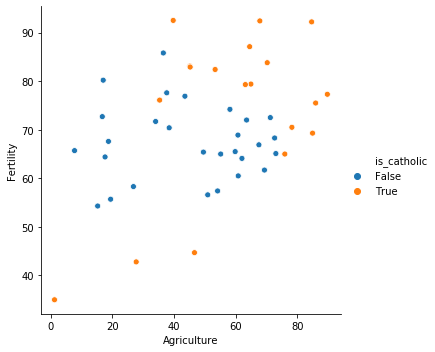

In [141]:
sns.relplot(data=swiss, x="Agriculture", y="Fertility", hue="is_catholic")

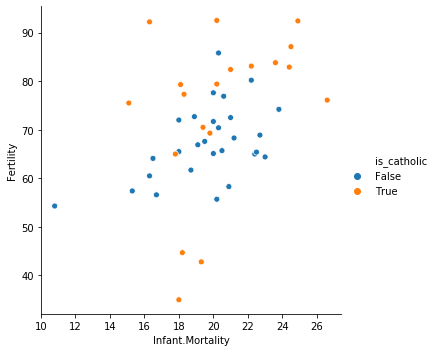

In [142]:
sns.relplot(data=swiss, x="Infant.Mortality", y="Fertility", hue="is_catholic")

In [137]:
# create bool mask for populations with at least 41% Catholic population
is_cath_mask = swiss["Catholic"] >= 41

# create new attribute in swiss df that holds bool values cath population
swiss["is_catholic"] = swiss["Catholic"] >= 41

In [138]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [95]:
# create DataFrame of is_catholic and fertility
cath_fertility = swiss[["is_catholic", "Fertility"]]
cath_fertility.head()

,is_catholic,Fertility
Courtelary,False,80.2
Delemont,True,83.1
Franches-Mnt,True,92.5
Moutier,False,85.8
Neuveville,False,76.9


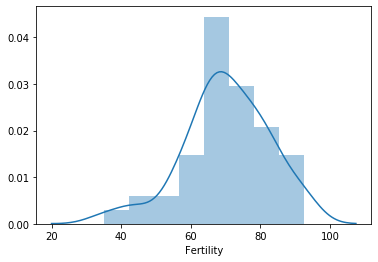

In [87]:
sns.

In [79]:
# DataFrame for Catholic populations
is_cath_df = swiss[is_cath_mask]
is_cath_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9


In [77]:
# DataFrame for populations with less than 41% Catholic population using 
# is_cath_mask == False
not_cath_df = swiss[is_cath_mask == False]
not_cath_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Aigle,64.1,62.0,21,12,8.52,16.5
Aubonne,66.9,67.5,14,7,2.27,19.1


In [97]:
# overall mean of Catholics in populations
swiss["Catholic"].mean()

41.14382978723404

In [144]:
cath_groups = swiss.groupby("is_catholic")
len(cath_groups)
cath_groups.groups

{False: Index(['Courtelary', 'Moutier', 'Neuveville', 'Aigle', 'Aubonne', 'Avenches',
        'Cossonay', 'Echallens', 'Grandson', 'Lausanne', 'La Vallee', 'Lavaux',
        'Morges', 'Moudon', 'Nyone', 'Orbe', 'Oron', 'Payerne', 'Paysd'enhaut',
        'Rolle', 'Vevey', 'Yverdon', 'Boudry', 'La Chauxdfnd', 'Le Locle',
        'Neuchatel', 'Val de Ruz', 'ValdeTravers'],
       dtype='object'),
 True: Index(['Delemont', 'Franches-Mnt', 'Porrentruy', 'Broye', 'Glane', 'Gruyere',
        'Sarine', 'Veveyse', 'Conthey', 'Entremont', 'Herens', 'Martigwy',
        'Monthey', 'St Maurice', 'Sierre', 'Sion', 'V. De Geneve',
        'Rive Droite', 'Rive Gauche'],
       dtype='object')}

In [76]:
# average fertility in populations that are not Catholic
not_cath_df["Fertility"].mean()

67.3357142857143

In [78]:
# average fertility in populations that are Catholic
is_cath_df["Fertility"].mean()

74.27894736842104

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [146]:
def get_db_url(username, hostname, password, db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [152]:
url = get_db_url(user, host, password, "chipotle")

In [153]:
df_chipotle = pd.read_sql('SELECT * FROM orders', url)

In [154]:
df_chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [184]:
# clean up the item_price by removing the $ and converting to a float

df_chipotle["item_price"] = df_chipotle["item_price"].str.strip("$")
df_chipotle["item_price"] = df_chipotle["item_price"].astype("float")

In [199]:
# groupby item and agg quantity by count and item_price by sum

items = df_chipotle.groupby("item_name").agg({"quantity": "count", "item_price": "sum"})

# create a new column called revenue that multiples quantity times revenue
items["revenue"] = items["quantity"] * items["item_price"]

In [198]:
# sort the quantity from largest to smallest and limit to top four to show
# four most popular

four_most_popular = items.sort_values("quantity", ascending=False).head(4)
four_most_popular

,quantity,item_price,revenue
item_name,,,
Chicken Bowl,726,7342.73,5330821.98
Chicken Burrito,553,5575.82,3083428.46
Chips and Guacamole,479,2201.04,1054298.16
Steak Burrito,368,3851.43,1417326.24
